<a href="https://colab.research.google.com/github/shajudata/ML-model/blob/main/Medical_insurance_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("/content/Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: >

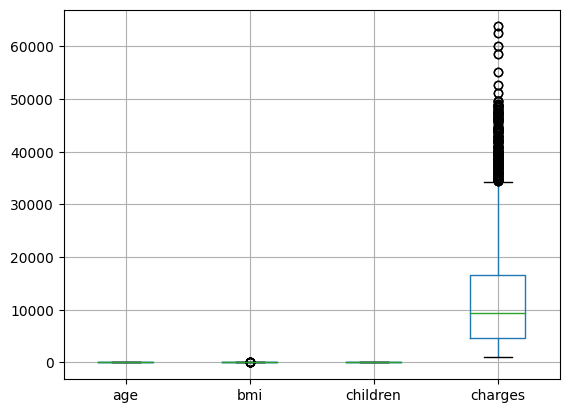

In [6]:
df.boxplot()

In [7]:
# Managing outliers in charges
Q1 = df.charges.quantile(0.25)
Q3 = df.charges.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outliers= df[(df['charges'] < lower_limit) | (df['charges'] >upper_limit)]
outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760
...,...,...,...,...,...,...,...
2735,52,male,41.80,2,yes,southeast,47269.8540
2736,64,male,36.96,2,yes,southeast,49577.6624
2744,32,male,33.63,1,yes,northeast,37607.5277
2764,22,female,31.02,3,yes,southeast,35595.5898


In [8]:
no_outliers = df[(df['charges'] >= lower_limit) | (df['charges'] <= upper_limit)]
no_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


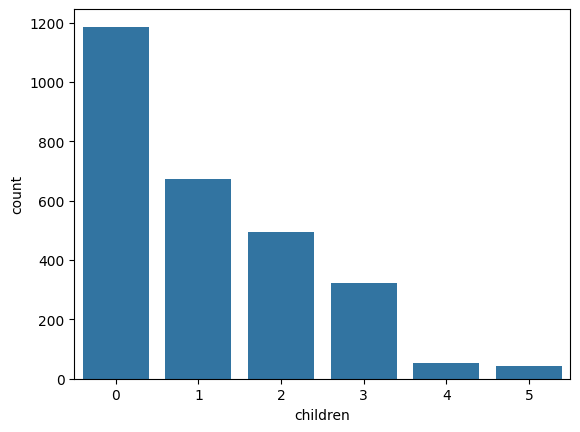

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# no of children count
sns.countplot(x = 'children', data = df)
plt.show()

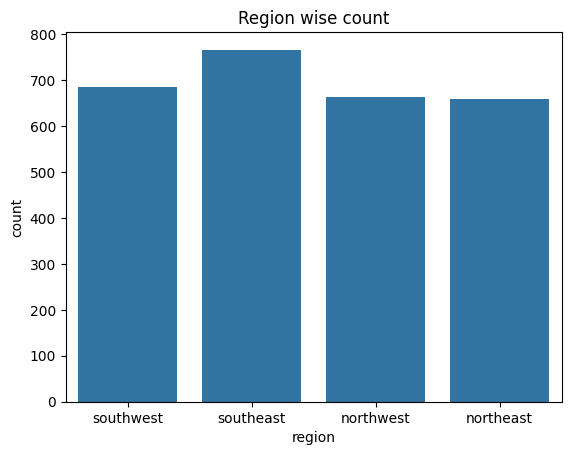

In [10]:
# plot by region wise
sns.countplot(x='region', data = df)
plt.title('Region wise count')
plt.show()

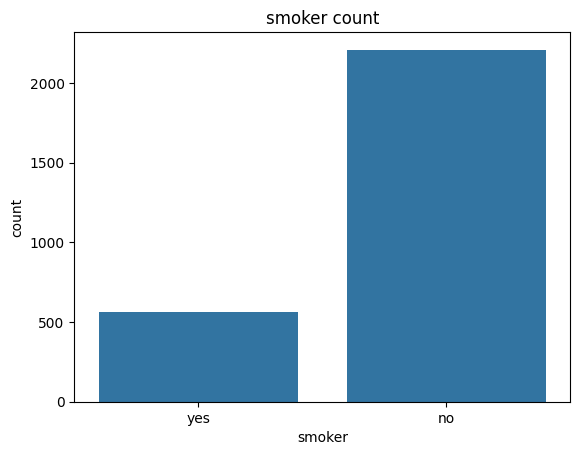

In [11]:
# plot no of smokers
sns.countplot(x='smoker',data = df)
plt.title('smoker count')
plt.show()

In [12]:
# smoker count by gender
df.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        1134
        yes        232
male    no        1074
        yes        332
Name: count, dtype: int64

In [13]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
df['sex'] = Label_encoder.fit_transform(df['sex'])
df['smoker']= Label_encoder.fit_transform(df['smoker'])
df['region'] = Label_encoder.fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [14]:
# data split
x = df.drop(['charges'], axis = 1)
y = df['charges']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.8)

In [15]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [16]:
#linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [17]:
#predicting on train data
ypred_train_lr = model.predict(xtrain)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2_score:', r2_score(ytrain,ypred_train_lr))
print('MSE:', mean_squared_error(ytrain,ypred_train_lr))


R2_score: 0.7501294865168187
MSE: 37576380.281577386


In [19]:
# predicting on test data
ypred_test_lr = model.predict(xtest)


In [20]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2_score:', r2_score(ytest,ypred_test_lr))
print('MSE:', mean_squared_error(ytest,ypred_test_lr))


R2_score: 0.7498037609789663
MSE: 36749539.35723159


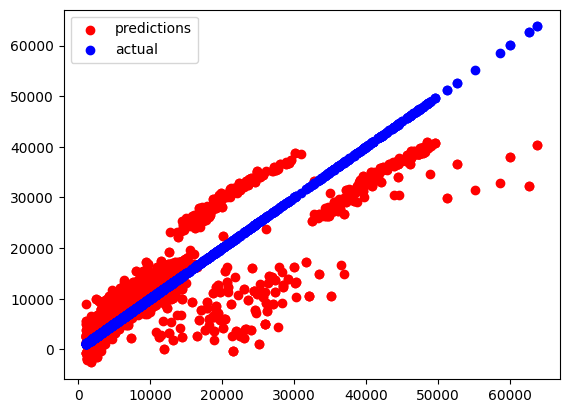

In [21]:
# scatter plot on actual predictions v predicted predictions
plt.scatter(ytest,ypred_test_lr,color='red',label='predictions')
plt.scatter(ytest,ytest,color='blue',label ='actual')
plt.legend()
plt.show()

In [22]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [23]:
# training decision tree
ypred_train_dt = model.predict(xtrain)

In [24]:
#test decision tree
ypred_test_dt = model.predict(xtest)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2_score:', r2_score(ytrain,ypred_train_dt))
print('MSE:', mean_squared_error(ytrain,ypred_train_dt))


R2_score: 1.0
MSE: 2.799573372810337e-28


In [26]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2_score:', r2_score(ytest,ypred_test_lr))
print('MSE:', mean_squared_error(ytest,ypred_test_lr))

R2_score: 0.7498037609789663
MSE: 36749539.35723159


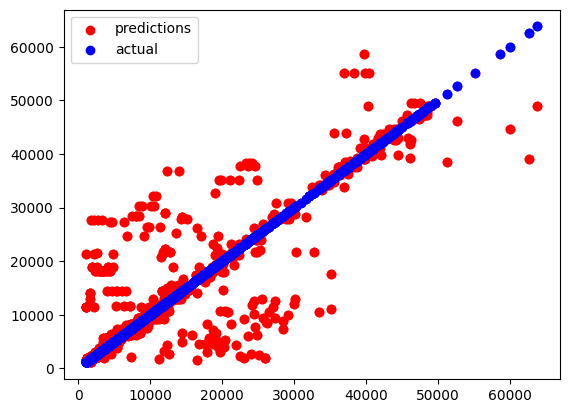

In [27]:
# scatter plot on actual predictions v predicted predictions
plt.scatter(ytest,ypred_test_dt,color='red',label='predictions')
plt.scatter(ytest,ytest,color='blue',label ='actual')
plt.legend()
plt.show()